In [4]:
import os
import pandas as pd
import numpy as np
import math
from collections import Counter
import mysql.connector
import matplotlib
from matplotlib import pyplot as plt
import datetime as dt
from datetime import date

In [70]:
def create_bins(lower_bound, width, quantity):
 
    bins = []
    for low in range(lower_bound, 
                     lower_bound + quantity*width + 1, width):
        bins.append((low, low+width))
    return bins

In [143]:
def binning(data, start_time, end_time):
    df = pd.read_csv(data)
    df.Time = pd.to_datetime(df.Time)
    df.Time = df.Time.map(lambda t: t.strftime('%H:%M'))
    df = df.drop_duplicates(['Time'])
    df.dropna()
    a = df.count()
    a = float(a[1])
    k = math.sqrt(a)
    d = round(k)
    max_val = df.max()
    min_val = df.min()
    m = min_val[1]
    interval = float(max_val[1] - min_val[1])/d  
    x = round(interval)
    bins = create_bins(lower_bound=int(m),
                   width=int(x),
                   quantity=int(d))
    s = bins
    add = []
    for i in bins:
        add.append(int(i[0]+i[1]))
    mid = []
    for i in add:
        mid.append(i/2)
    mean = []
    mid = [int(i) for i in mid] 
    for i in range(0,len(mid),3):
        mean.append((mid[i]+mid[i+1]+mid[i+2])//3)
    period = len(mean)
    ds = pd.DataFrame(pd.date_range(start_time, end_time, periods=period), columns=['Time'])
    ds['Time'] = pd.to_datetime(ds['Time']).dt.time
    ds['Volume'] = mean
    return ds
    

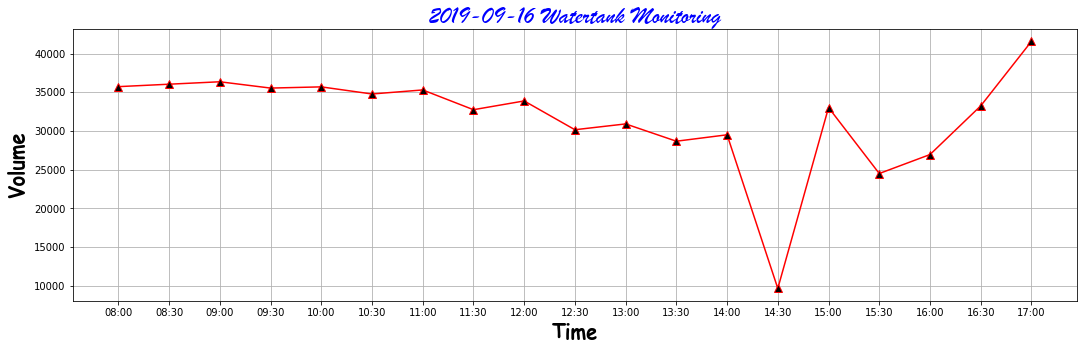

In [160]:
data = r"C:\Users\mythi\Downloads\WaterTank Data\TankData1.csv"
result = binning(data, '8:00', '9:00')
data = r"C:\Users\mythi\Downloads\WaterTank Data\TankData2.csv"
result = result.append(binning(data, '9:00', '10:00'))
data = r"C:\Users\mythi\Downloads\WaterTank Data\TankData3.csv"
result = result.append(binning(data, '10:00', '11:00'))
data = r"C:\Users\mythi\Downloads\WaterTank Data\TankData4.csv"
result = result.append(binning(data, '11:00', '12:00'))
data = r"C:\Users\mythi\Downloads\WaterTank Data\TankData5.csv"
result = result.append(binning(data, '12:00', '13:00'))
data = r"C:\Users\mythi\Downloads\WaterTank Data\TankData6.csv"
result = result.append(binning(data, '13:00', '14:00'))
data = r"C:\Users\mythi\Downloads\WaterTank Data\TankData7.csv"
result = result.append(binning(data, '14:00', '15:00'))
data = r"C:\Users\mythi\Downloads\WaterTank Data\TankData8.csv"
result = result.append(binning(data, '15:00', '16:00'))
data = r"C:\Users\mythi\Downloads\WaterTank Data\TankData9.csv"
result = result.append(binning(data, '16:00', '17:00'))
result = result.drop_duplicates(['Time'])
result.Time = result.Time.map(lambda t: t.strftime('%H:%M'))                                                      
plt.plot(result['Time'],result['Volume'], color = 'red', marker='^', markerfacecolor='black', markersize=8)
plt.title(str(date.today()) +' Watertank Monitoring',fontweight='bold', color = 'blue', fontsize='25', horizontalalignment='center', fontname = 'Brush Script MT')
plt.xlabel('Time', fontweight='bold', color = 'black', fontsize='20', horizontalalignment='center', fontname = 'Comic Sans MS')
plt.ylabel('Volume', fontweight='bold', color = 'black', fontsize='20', horizontalalignment='center', fontname = 'Comic Sans MS')
plt.grid()
plt.rcParams['figure.figsize'] = (18,5)
plt.savefig(r'C:\Users\mythi\Downloads\WaterTank Data\Live.jpg', dpi=200, quality = 95)
plt.show()



In [9]:
dirc = r'C:\Users\mythi\Downloads\WaterTank Data'
for files in os.listdir(dirc):
    os.remove(dirc+'/'+files)

In [11]:
dt = date.today()
dt.week_of_month

AttributeError: 'datetime.date' object has no attribute 'week_of_month'